# OTOC oscillations in open quantum systems

In [1]:
from otoc import OTOC
import numpy as np
import matplotlib.pyplot as plt

/home/users/kenmaeda/chaos/otoc.py:10: SyntaxWarning: invalid escape sequence '\m'
  '''


We consider the following Hamiltonian:

$H = -J \sum_{i=0}^{L-2} \sigma_i^z \sigma_{i+1}^z + \sum_{i=0}^{L-1} (h_x \sigma_i^x + h_z \sigma_i^z) $

In the inifinite temperature limit, the OTOC for the spin chain is given by: 

$C^{\mu\nu}_{ij}(t) = \frac{1}{2}<[\sigma^{\mu}_i(t),\sigma^{\nu}_j]^2> = 1-Re\{Tr[\sigma^{\mu}_i(t)\sigma^{\nu}_j\sigma^{\mu}_i(t)\sigma^{\nu}_j]\}/D$,

where $D$ is the dimension of the Hilbert space.

## Closed system (unitary dynamics)

Following an example in the paper [*Signatures of quantum chaos transition in short spin chains*](https://arxiv.org/pdf/2004.14440), we set $J=1$, $h_x=1$, $h_z=0$ and consider the OTOC $C^{ZX}_{03}(t)$ for a spin chain of length $L=4$.

/home/users/kenmaeda/tutorial_env/lib/python3.13/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:606: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/home/users/kenmaeda/tutorial_env/lib/python3.13/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


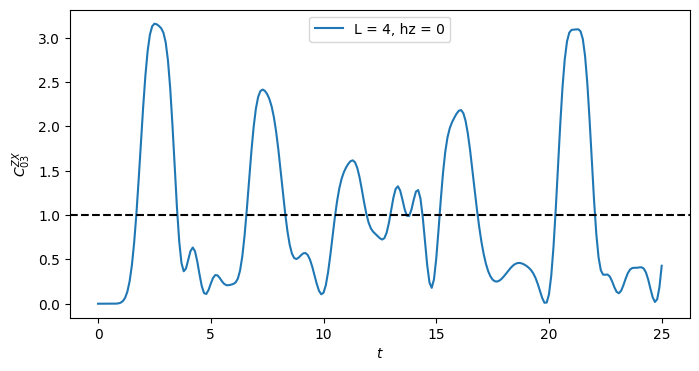

In [3]:
otoc = OTOC.init(L=4, J=1, hz=0, hx=1, mu='Z', nu='X', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
    dynamics='unitary')

otoc.analysis()
otoc.plot_otoc()

Now this time, $h_z = 0.5$ (chaotic regime). 

/home/users/kenmaeda/tutorial_env/lib/python3.13/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:606: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/home/users/kenmaeda/tutorial_env/lib/python3.13/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


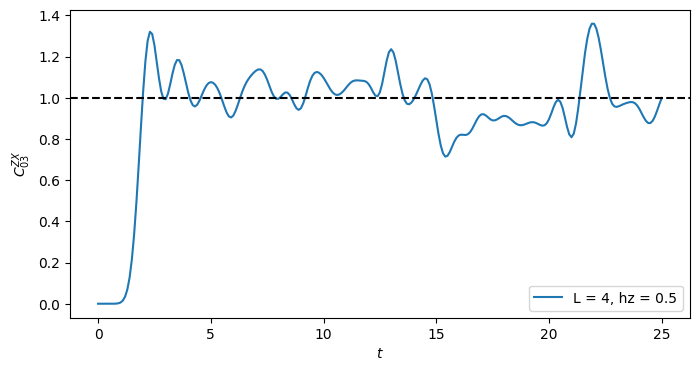

In [4]:
otoc = OTOC.init(L=4, J=1, hz=0.5, hx=1, mu='Z', nu='X', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
    dynamics='unitary')

otoc.analysis()
otoc.plot_otoc()

The fluctuations of the oscillations in the OTOC are smaller compared to the integrable case ($h_z = 0$). This can be regarded as a signature of non-integrability.

## Open system (dephasing dynamics)

In the open quantum system setting, the time evolution of an operator $A(t)$ in the Heisenberg picture is governed by the following Lindblad master equation:

$$
\frac{dA}{dt} = i[H, A] + \sum_k \left( L_k^\dagger A L_k - \tfrac{1}{2}\{ L_k^\dagger L_k, A \} \right),
$$

where $H$ is the system Hamiltonian and $L_k$ are the Lindblad operators (jump operators).

### 1. $L_k = \sqrt{\kappa} \sigma_k^z$ (dephasing noise)

To check that the code is working correctly, try $\kappa = 0$, which should reproduce the unitary dynamics case.

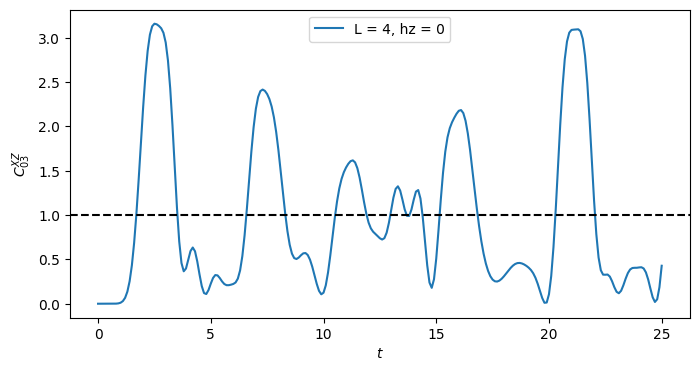

In [9]:
otoc = OTOC.init(L=4, J=1, hz=0, hx=1, mu='X', nu='Z', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
    dynamics='dephasing', kappa=0, location='boundary', direction='Z')

otoc.analysis()
otoc.plot_otoc()

This is the same curve as above, which is expected.

Now, this time, $\kappa = 0.05$. First consider the case where dephasing only acts on the boundary spins (0 and 3).

(i) $h_z = 0$ (integrable regime)

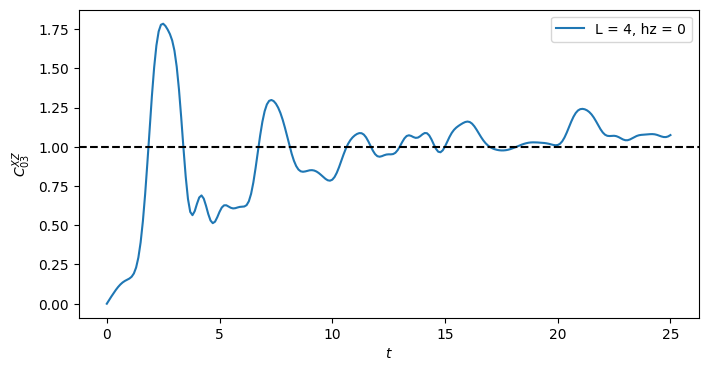

In [14]:
otoc = OTOC.init(L=4, J=1, hz=0, hx=1, mu='X', nu='Z', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
    dynamics='dephasing', kappa=0.05, location='boundary', direction='Z')

otoc.analysis()
otoc.plot_otoc()

The first peak of the oscillation is suppressed, and the oscillations are also decaying over time.

(ii) $h_z = 0.5$ (non-integrable regime)

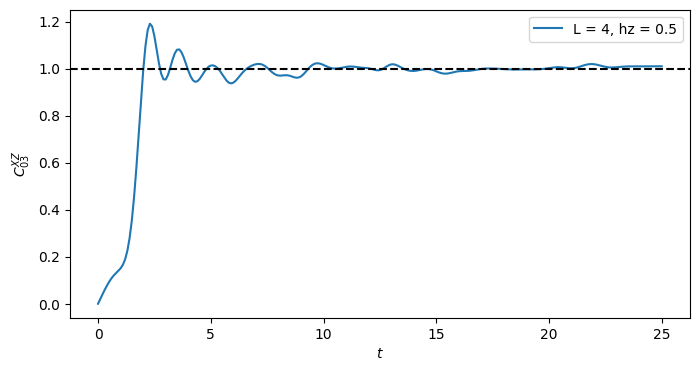

In [15]:
otoc = OTOC.init(L=4, J=1, hz=0.5, hx=1, mu='X', nu='Z', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
    dynamics='dephasing', kappa=0.05, location='boundary', direction='Z')

otoc.analysis()
otoc.plot_otoc()

The oscillations die out more quickly compared to the integrable case.

Now, what if dephasing acts on all spins instead of just the boundary spins?

(i) $h_z = 0$ (integrable regime)

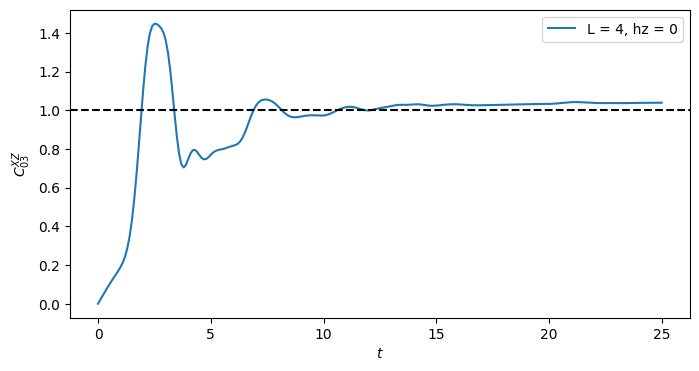

In [16]:
otoc = OTOC.init(L=4, J=1, hz=0, hx=1, mu='X', nu='Z', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
    dynamics='dephasing', kappa=0.05, location='bulk', direction='Z')

otoc.analysis()
otoc.plot_otoc()

(ii) $h_z = 0.5$ (non-integrable regime)

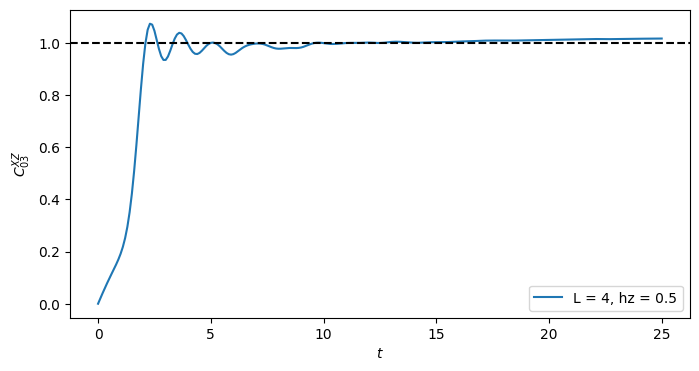

In [17]:
otoc = OTOC.init(L=4, J=1, hz=0.5, hx=1, mu='X', nu='Z', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
    dynamics='dephasing', kappa=0.05, location='bulk', direction='Z')

otoc.analysis()
otoc.plot_otoc()

In both cases, the oscillations decay quickly compared to the boundary-only dephasing case. The difference between the integrable and non-integrable regimes is less obvious when dephasing acts on all spins, except for first few peaks.

#### $\kappa$ dependence

(i) $h_z = 0$ (integrable regime)

In [22]:
tstep = 0.1
dt_min = 10
dt_max = 25

dtlist   = np.arange(dt_min, dt_max, 5)
kappas   = [1e-3, 3e-3, 1e-2, 3e-2, 1e-1]
chilist  = np.zeros((len(dtlist), len(kappas)))
stdlist  = np.zeros(len(kappas))

for l, Dt in enumerate(dtlist):
    t_end = Dt + 5 

    for k, kappa in enumerate(kappas):

        otoc = OTOC.init(L=4, J=1, hz=0, hx=1, mu='X', nu='Z', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
                dynamics='dephasing', kappa=kappa, location='boundary', direction='Z')
        otoc.analysis()
        stdlist[k] = otoc.std

    std_inv = 1/stdlist
    chilist[l] = (std_inv - np.min(std_inv)) / (np.max(std_inv) - np.min(std_inv))

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_4175386/2023523686.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi(C^{zx}_{0,3}) $')


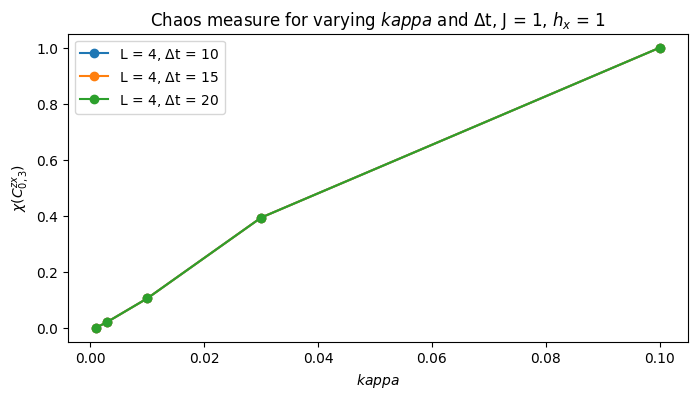

In [26]:
# Integrable limit: 𝜒 -> 0; Chaos limit: 𝜒 -> 1
plt.figure(figsize=(8,4))
for l, Dt in enumerate(dtlist):
    plt.plot(kappas,chilist[l], "-o", label = rf'L = {otoc.mfim.L}, $\Delta$t = {Dt}')
plt.xlabel('$kappa$')
plt.ylabel('$\chi(C^{zx}_{0,3}) $')
plt.title(rf"Chaos measure for varying $kappa$ and $\Delta$t, J = {otoc.mfim.J}, $h_x$ = {otoc.mfim.hx}")
plt.legend()

(ii) $h_z = 0.5$ (non-integrable regime)

In [24]:
tstep = 0.1
dt_min = 10
dt_max = 25

dtlist   = np.arange(dt_min, dt_max, 5)
kappas   = [1e-3, 3e-3, 1e-2, 3e-2, 1e-1]
chilist  = np.zeros((len(dtlist), len(kappas)))
stdlist  = np.zeros(len(kappas))

for l, Dt in enumerate(dtlist):
    t_end = Dt + 5 

    for k, kappa in enumerate(kappas):

        otoc = OTOC.init(L=4, J=1, hz=0.5, hx=1, mu='X', nu='Z', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
                dynamics='dephasing', kappa=kappa, location='boundary', direction='Z')
        otoc.analysis()
        stdlist[k] = otoc.std

    std_inv = 1/stdlist
    chilist[l] = (std_inv - np.min(std_inv)) / (np.max(std_inv) - np.min(std_inv))

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_4175386/2023523686.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi(C^{zx}_{0,3}) $')


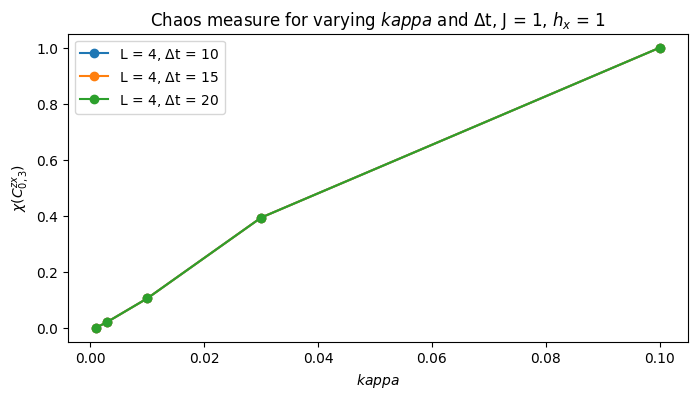

In [25]:
# Integrable limit: 𝜒 -> 0; Chaos limit: 𝜒 -> 1
plt.figure(figsize=(8,4))
for l, Dt in enumerate(dtlist):
    plt.plot(kappas,chilist[l], "-o", label = rf'L = {otoc.mfim.L}, $\Delta$t = {Dt}')
plt.xlabel('$kappa$')
plt.ylabel('$\chi(C^{zx}_{0,3}) $')
plt.title(rf"Chaos measure for varying $kappa$ and $\Delta$t, J = {otoc.mfim.J}, $h_x$ = {otoc.mfim.hx}")
plt.legend()

Basically, $\chi$ goes to 1 as $\kappa$ increases, regardless of the value of $h_z$. It can be understood that the information is lost not because it is scrambled but it escapes to the environment.

### 2. $L_1 = \sqrt{\gamma (n_{\text{th}}+1)}\,\sigma_{-}, \quad L_2 = \sqrt{\gamma n_{\text{th}}}\,\sigma_{+}$ (amplitude damping at finite temperature)

coming soon...

## Appendix

Solving the Lindblad master equation in Heisenberg picture is not a simple task. In the code, I used a vectorization technique, following this [lecture notes](http://www.fmt.if.usp.br/~gtlandi/11---lindblad-equation-2.pdf).

The main idea is to convert the Heisenberg equation for an operator $A(t)$ into a first-order linear ODE $\dot x(t) = \mathcal{L} x(t)$.

The equation we want to solve is

$$
\frac{dA}{dt} = i[H, A] + \sum_k \left( L_k^\dagger A L_k - \tfrac{1}{2}\{ L_k^\dagger L_k, A \} \right),
$$

By using the following formula
$$
\mathrm{vec}(A X B) \;=\; (B^{\mathsf T}\!\otimes A)\,\mathrm{vec}(X).
$$

Each term can be vectorized as follows:

- Hamiltonian commutator:
$$
\mathrm{vec}\big(i[H,A]\big)
\;=\; i\,(I\otimes H - H^{\mathsf T}\!\otimes I)\,\mathrm{vec}(A).
$$

- Dissipator first term:
$$
\mathrm{vec}\big(L_k^\dagger A L_k\big)
\;=\; (L_k^{\mathsf T}\!\otimes L_k^\dagger)\,\mathrm{vec}(A).
$$

- Anticommutator pieces:
$$
\mathrm{vec}\big(-(1/2)\,L_k^\dagger L_k\,A\big)
= -\tfrac12\,(I\otimes L_k^\dagger L_k)\,\mathrm{vec}(A),
$$
$$
\mathrm{vec}\big(-(1/2)\,A\,L_k^\dagger L_k\big)
= -\tfrac12\,\big((L_k^\dagger L_k)^{\mathsf T}\!\otimes I\big)\,\mathrm{vec}(A).
$$

Summing all contributions gives the Liouvillian:
$$
\boxed{\;
\mathcal{L}
= i\,(I\otimes H - H^{\mathsf T}\!\otimes I)
\;+\; \sum_k \Big[
\,L_k^{\mathsf T}\!\otimes L_k^\dagger
\;-\;\tfrac12\,(I\otimes L_k^\dagger L_k)
\;-\;\tfrac12\,\big((L_k^\dagger L_k)^{\mathsf T}\!\otimes I\big)
\Big].
\;}
$$

Now, define $x(t)=\mathrm{vec}\big(A(t)\big)$. Then
$$
\dot x(t) \;=\; \mathcal{L}\,x(t), \qquad
x(t) \;=\; e^{\mathcal{L}t}\,x(0).
$$
Equivalently, $A(t)$ is obtained by unvectorizing $x(t)$.
